[1 2 4 3]


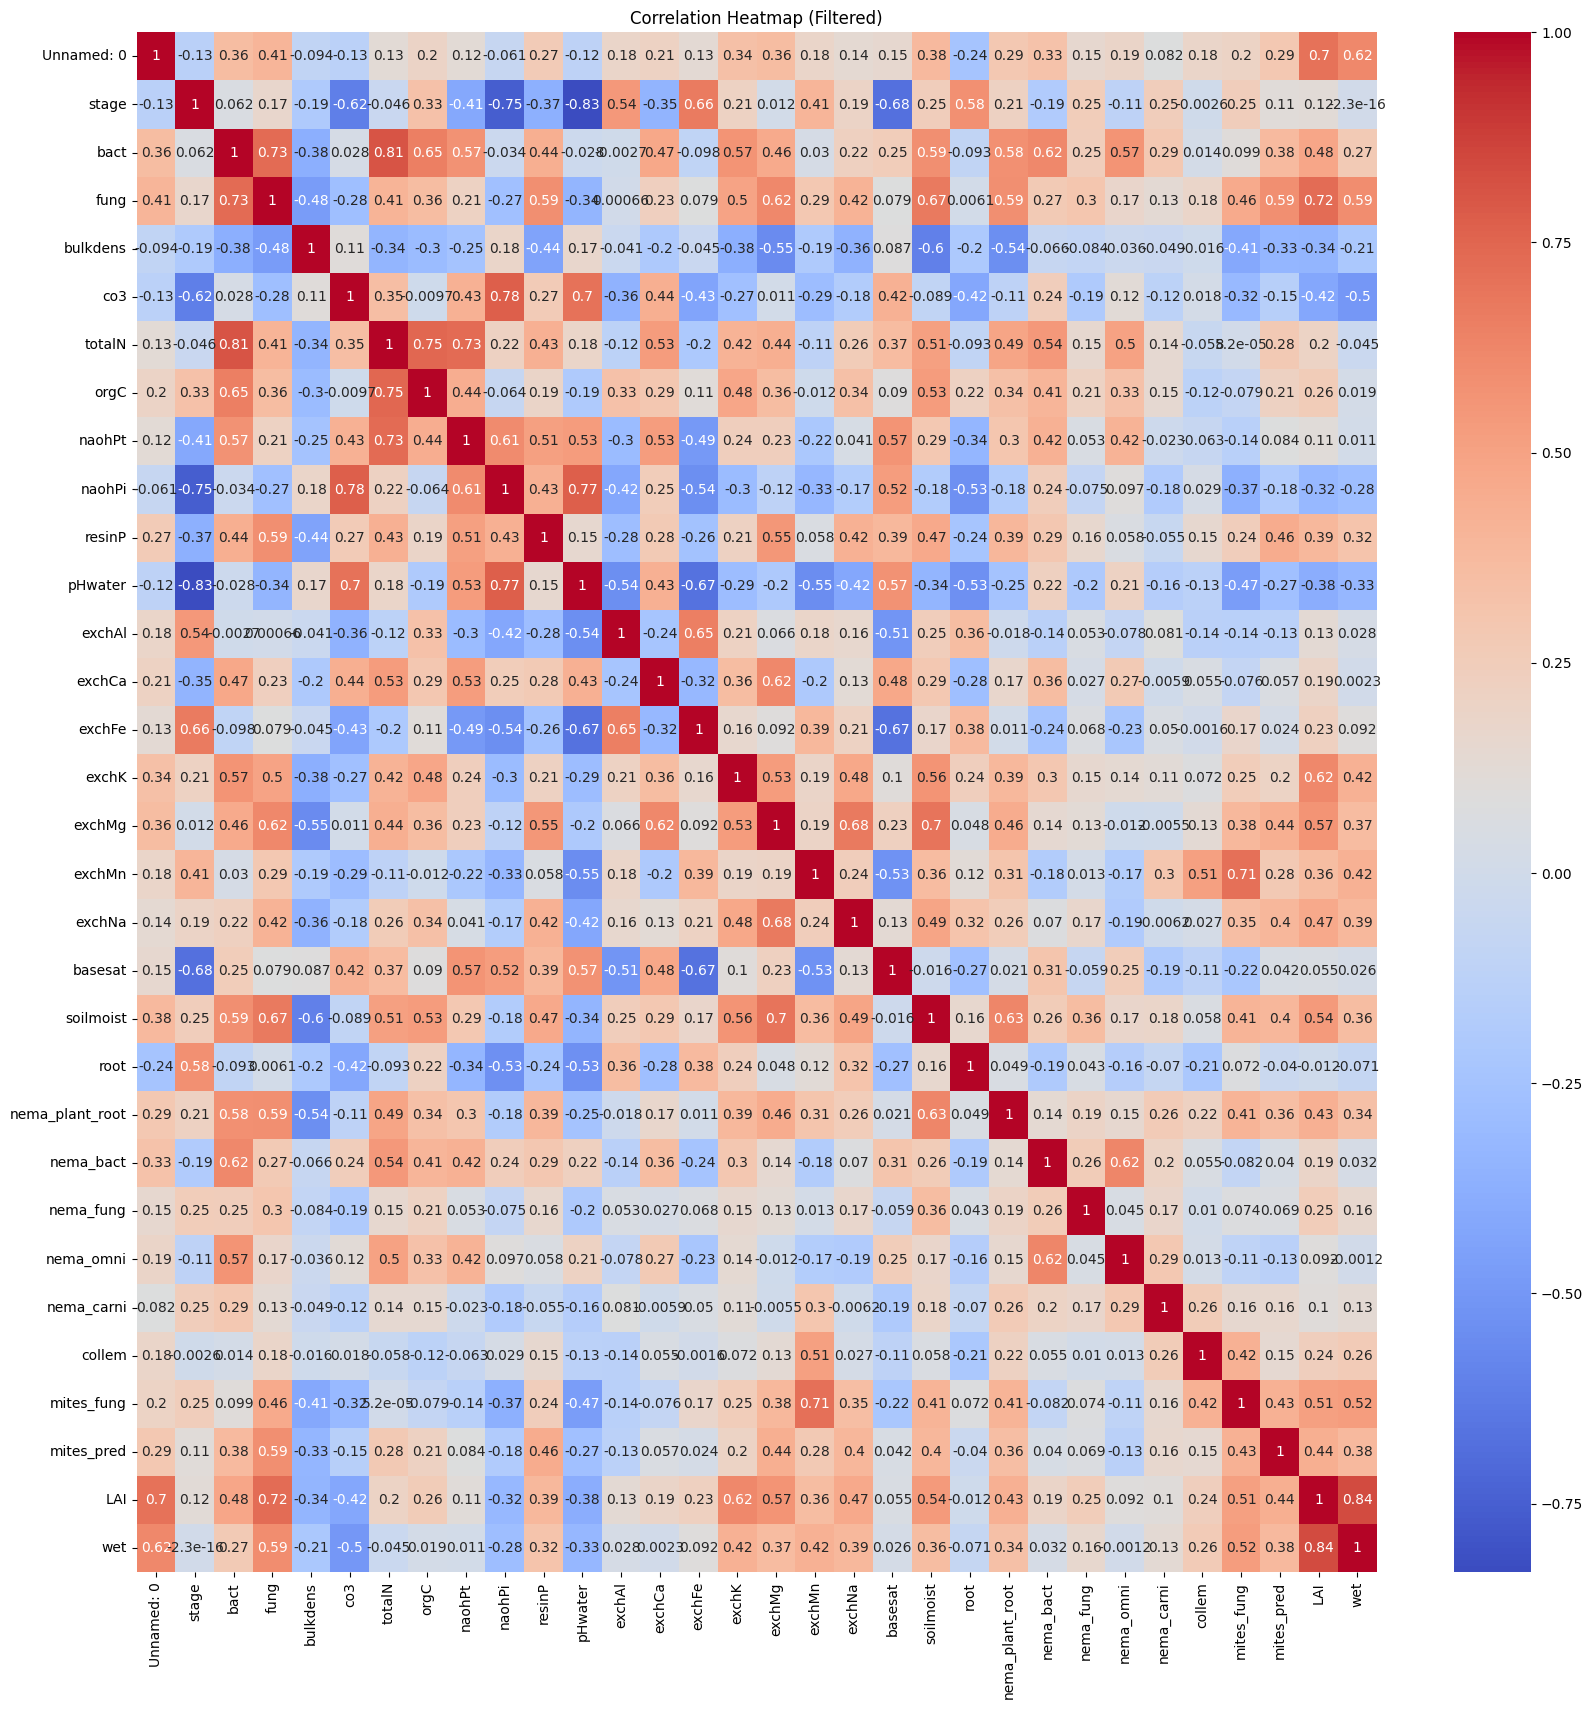

Removed features: {'inorgC', 'naohPo', 'totalC', 'ecec', 'totalP', 'pHbacl2', 'pHcacl2', 'stagenum', 'teb'}


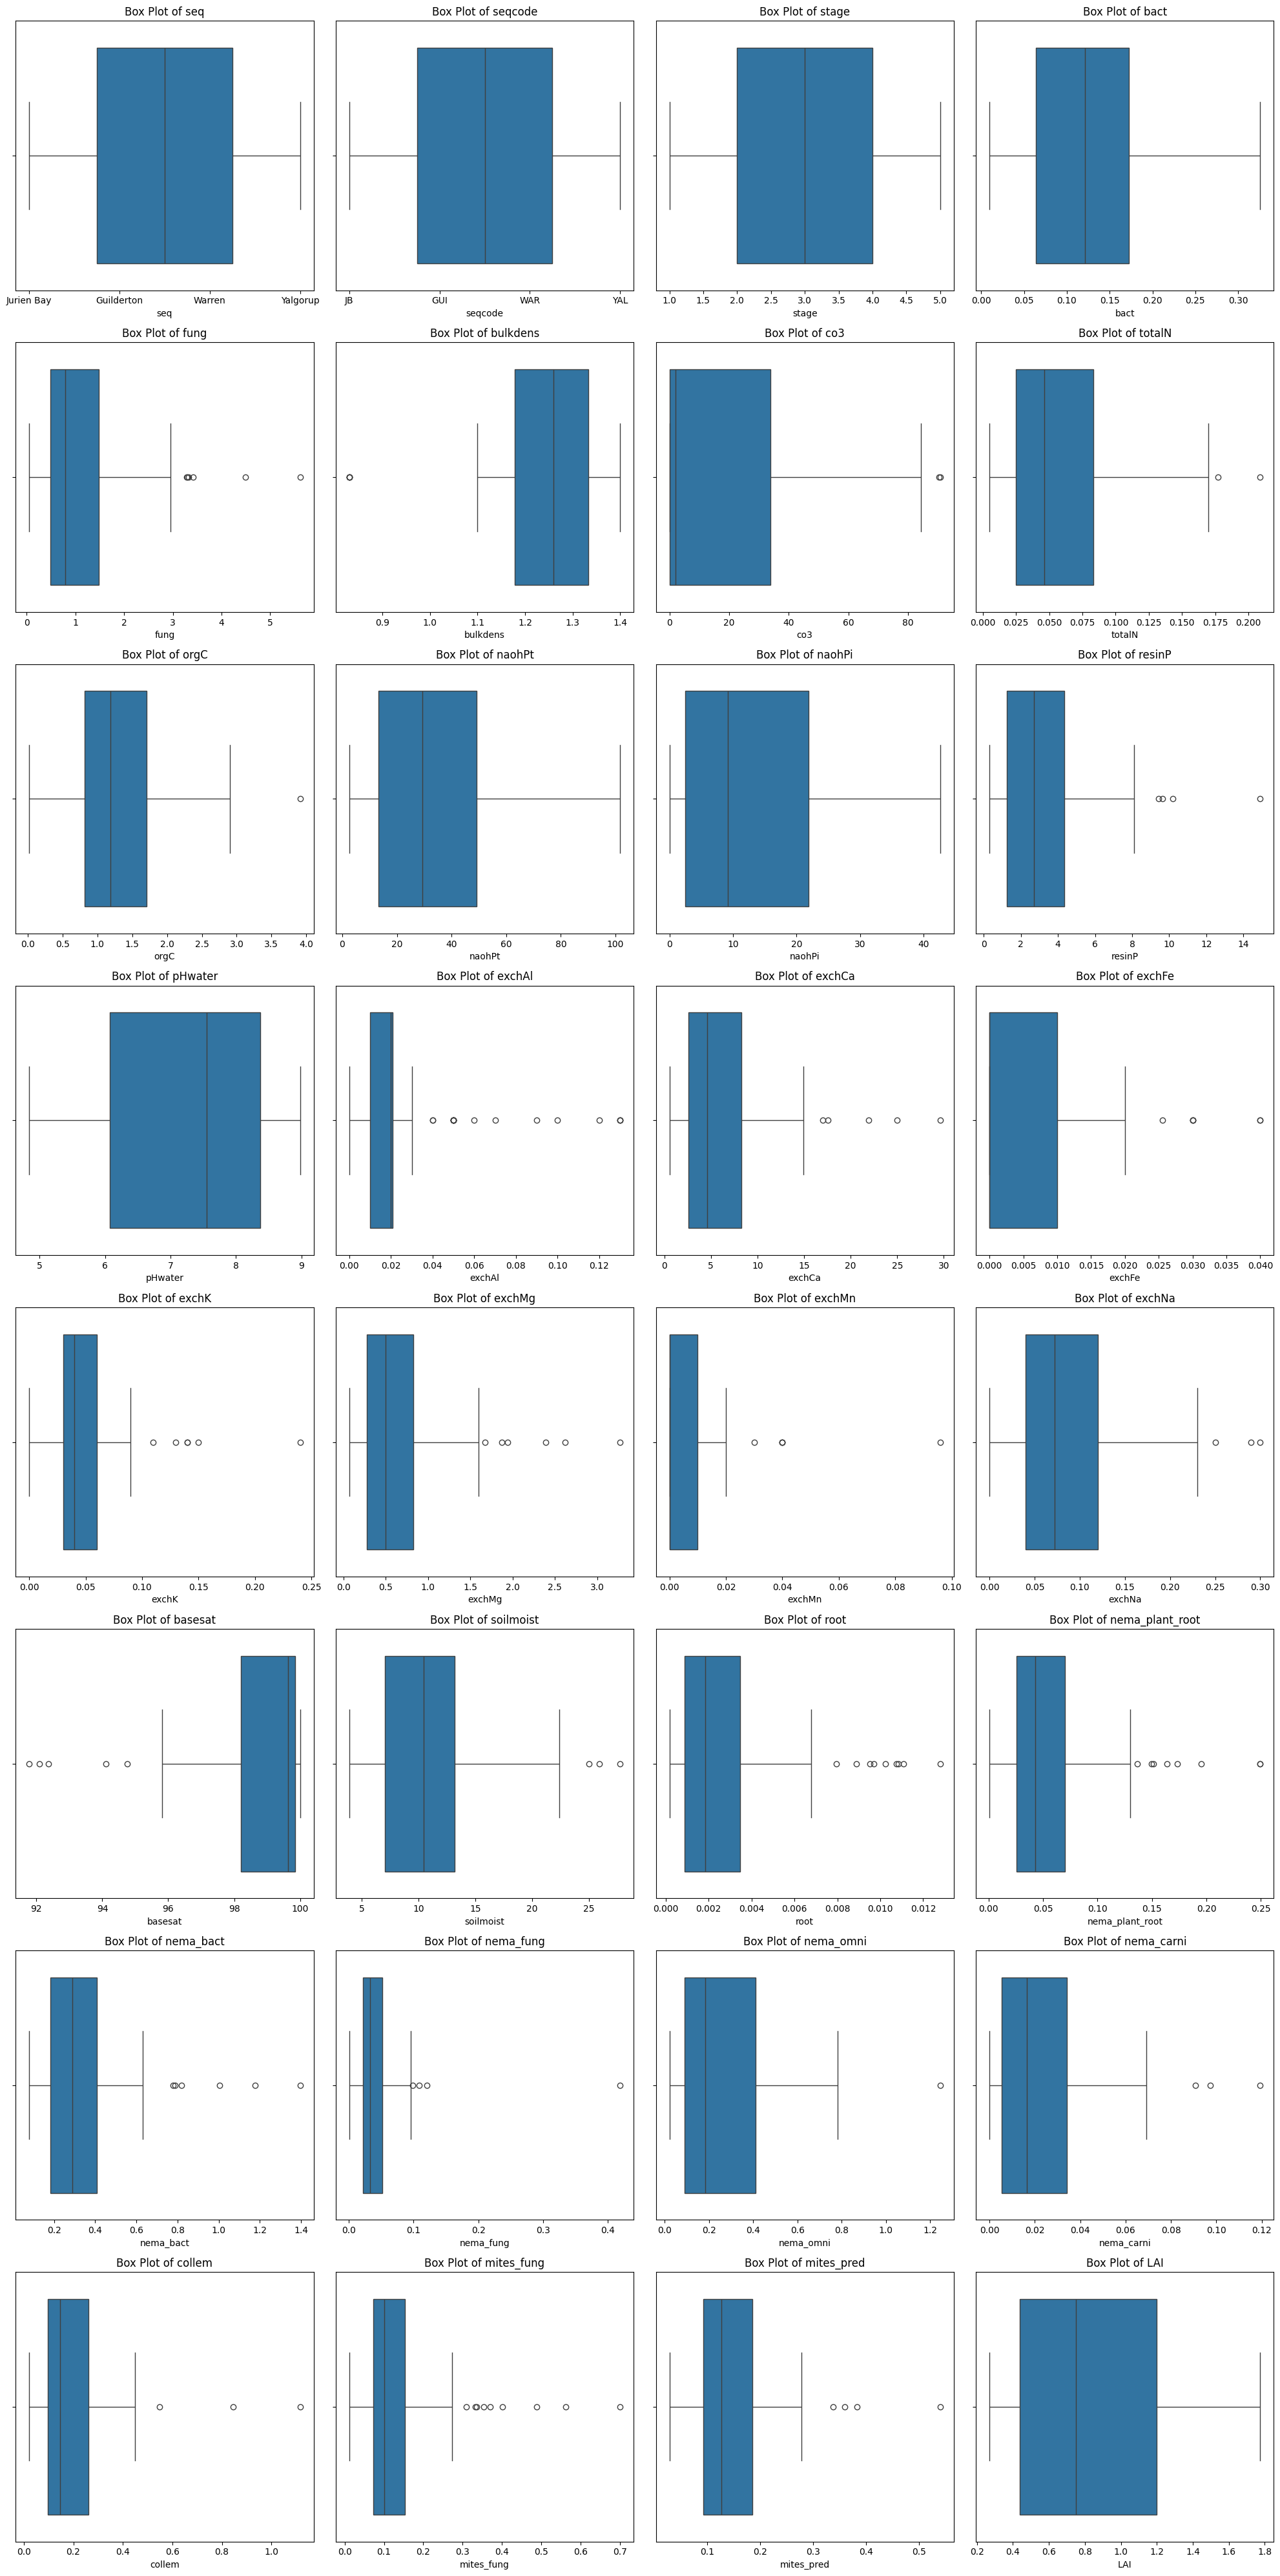

Index(['Unnamed: 0', 'stage', 'bact', 'fung', 'bulkdens', 'co3', 'totalN',
       'orgC', 'naohPt', 'naohPi', 'resinP', 'pHwater', 'exchAl', 'exchCa',
       'exchFe', 'exchK', 'exchMg', 'exchMn', 'exchNa', 'basesat', 'soilmoist',
       'root', 'nema_plant_root', 'nema_bact', 'nema_fung', 'nema_omni',
       'nema_carni', 'collem', 'mites_fung', 'mites_pred', 'LAI', 'wet'],
      dtype='object')


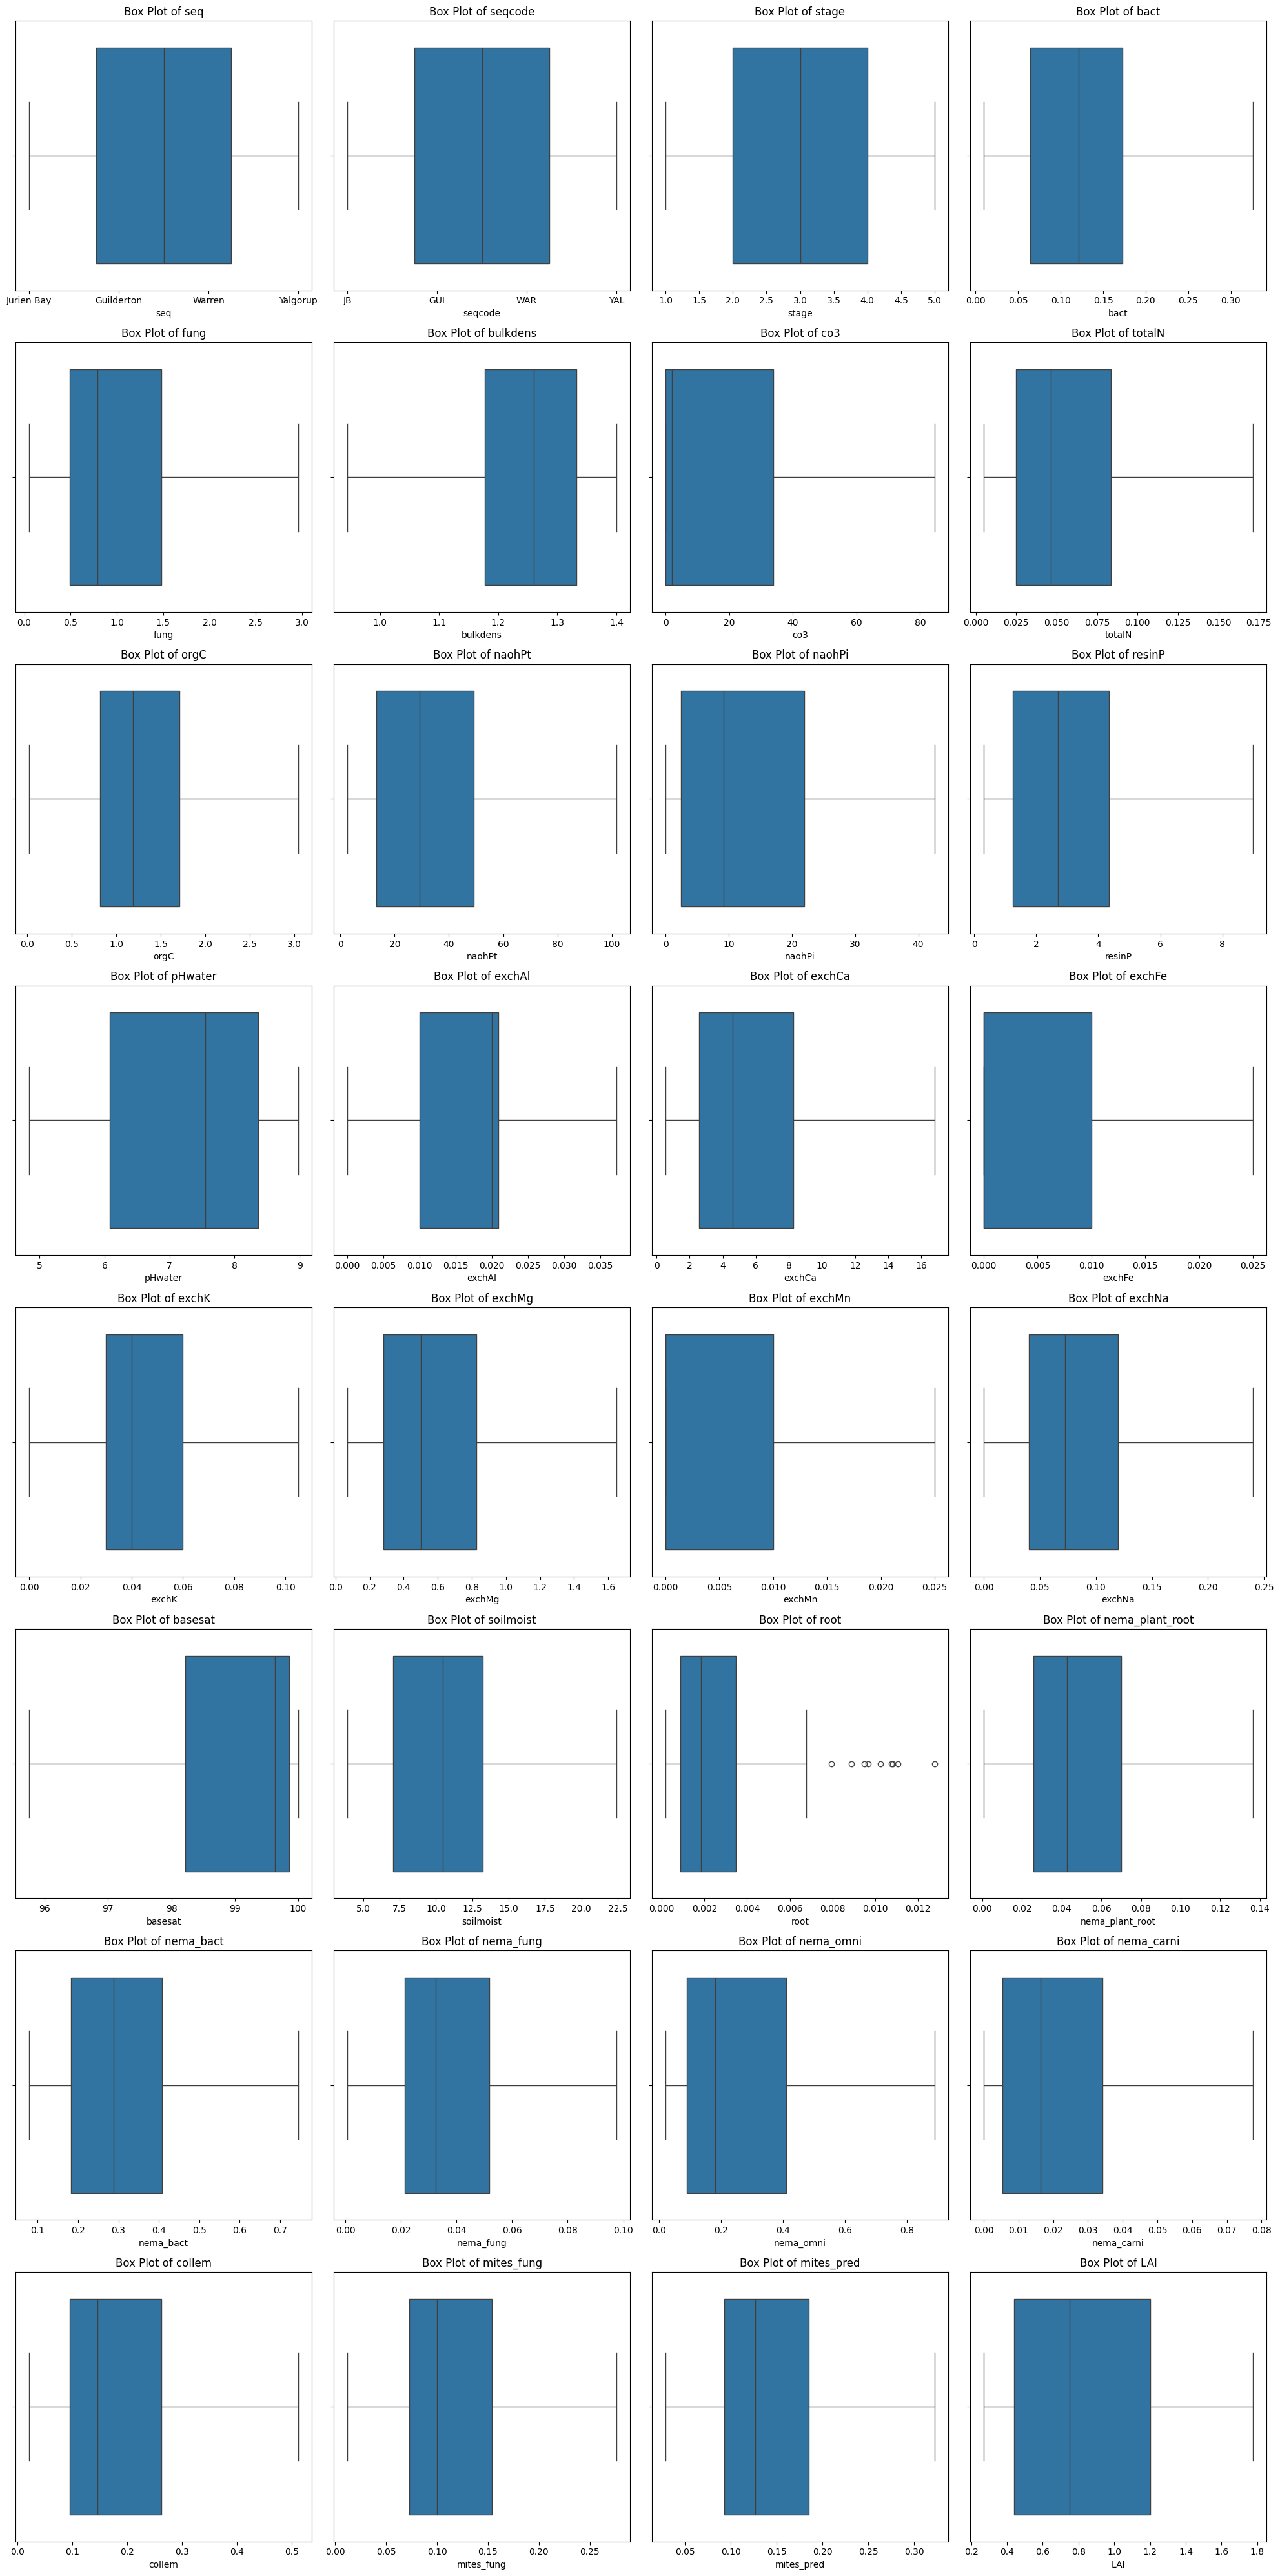

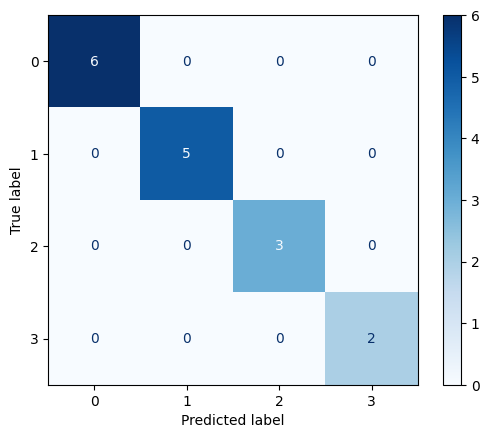

Column sums: [87.24283500000001, 99.89999999999999, 1612.4249999999997, 4.7005, 103.86625000000001, 2617.7, 1002.5, 250.22500000000002, 573.5799999999999, 1.4299300000000001, 472.61855, 0.5700000000000001, 3.67007, 52.051339999999996, 0.325, 7.0945800000000006, 7912.19375, 892.6926669904999, 0.2384993215855381, 4.2932986, 25.5196822, 3.2374362, 21.002981625, 1.7583142625, 14.522990991636128, 10.063127124970217, 11.304228680170954, 67.91, 200.0]
The SSC is 74438212.61540133
The SSW is 113192.57823261792
The SST is 0.0
F-statistic: 53807.77601848789


<ipython-input-2-772601425>:208: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  col_mean = column_means[i]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Dataset (3).csv')
dataset.head()

dataset.isnull().sum()/dataset.shape[0]

dataset.duplicated().sum()

print(dataset['wet'].unique())

# for i in dataset.select_dtypes(include='object').columns:
#   print(dataset.value_counts(i))
#   print('----'*10)

corr1 = dataset.select_dtypes(include='number').corr()

high_corr_pairs = []
threshold = 0.85

for i in range(len(corr1.columns)):
    for j in range(i + 1, len(corr1.columns)):
        if abs(corr1.iloc[i, j]) > threshold:
            feature1 = corr1.columns[i]
            feature2 = corr1.columns[j]
            high_corr_pairs.append((feature1, feature2))

features_to_remove = set()
for pair in high_corr_pairs:
    features_to_remove.add(pair[1])

filtered_dataset = dataset.drop(columns=features_to_remove)

plt.figure(figsize=(20, 20))
corr_filtered = filtered_dataset.select_dtypes(include='number').corr()
sb.heatmap(corr_filtered, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Filtered)")
plt.show()

print(f"Removed features: {features_to_remove}")
filtered_dataset.to_csv('/content/filtered_soil_dataset.csv', index=False)
dataset = pd.read_csv('/content/filtered_soil_dataset.csv')

features = ['seq', 'seqcode', 'stage', 'bact', 'fung', 'bulkdens', 'co3',
                   'totalN', 'orgC', 'naohPt', 'naohPi', 'resinP', 'pHwater',
                   'exchAl', 'exchCa', 'exchFe', 'exchK', 'exchMg', 'exchMn',
                   'exchNa', 'basesat', 'soilmoist', 'root', 'nema_plant_root',
                   'nema_bact', 'nema_fung', 'nema_omni', 'nema_carni', 'collem',
                   'mites_fung', 'mites_pred', 'LAI']

n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sb.boxplot(data=dataset, x=feature, ax=axes[i])
    axes[i].set_title(f"Box Plot of {feature}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

print(dataset.select_dtypes(include='number').columns)
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lower=q1-1.5*iqr
  upper=q3+1.5*iqr
  return lower,upper

for i in ['seq', 'seqcode', 'stage', 'bact', 'fung', 'bulkdens', 'co3',
          'totalN', 'orgC', 'naohPt', 'naohPi', 'resinP', 'pHwater',
          'exchAl', 'exchCa', 'exchFe', 'exchK', 'exchMg', 'exchMn',
          'exchNa', 'basesat', 'soilmoist', 'root', 'nema_plant_root',
          'nema_bact', 'nema_fung', 'nema_omni', 'nema_carni', 'collem',
          'mites_fung', 'mites_pred', 'LAI']:
    if pd.api.types.is_numeric_dtype(dataset[i]):
        lower, upper = wisker(dataset[i])
        dataset[i] = np.where(dataset[i] < lower, lower, dataset[i])
        dataset[i] = np.where(dataset[i] > upper, upper, dataset[i])

features = ['seq', 'seqcode', 'stage', 'bact', 'fung', 'bulkdens', 'co3',
                   'totalN', 'orgC', 'naohPt', 'naohPi', 'resinP', 'pHwater',
                   'exchAl', 'exchCa', 'exchFe', 'exchK', 'exchMg', 'exchMn',
                   'exchNa', 'basesat', 'soilmoist', 'root', 'nema_plant_root',
                   'nema_bact', 'nema_fung', 'nema_omni', 'nema_carni', 'collem',
                   'mites_fung', 'mites_pred', 'LAI']

n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sb.boxplot(data=dataset, x=feature, ax=axes[i])
    axes[i].set_title(f"Box Plot of {feature}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

dataset.select_dtypes(include='number').columns

dataset.drop_duplicates()

dataset.head()

updated=pd.get_dummies(data=dataset,columns=['plot','seq','seqcode'])

updated

# sb.pairplot(dataset,vars=['stage', 'stagenum', 'bact', 'fung', 'bulkdens', 'co3',
#        'inorgC', 'totalC', 'totalN', 'orgC', 'naohPt', 'naohPi', 'naohPo',
#        'resinP', 'totalP', 'pHwater', 'pHcacl2', 'pHbacl2', 'exchAl', 'exchCa',
#        'exchFe', 'exchK', 'exchMg', 'exchMn', 'exchNa', 'teb', 'ecec',
#        'basesat', 'soilmoist', 'root', 'nema_plant_root', 'nema_bact',
#        'nema_fung', 'nema_omni', 'nema_carni', 'collem', 'mites_fung',
#        'mites_pred', 'LAI', 'wet'])
# plt.show()


X = updated.drop('wet', axis=1)
y = updated['wet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

dataset.head()

"""ANOVA"""

# for i in range(36):
#     col_name = f"col{i+1}"
#     globals()[col_name] = dataset.iloc[:, 6+i]
# cols = {}
# for i in range(36):
#     cols[f"col{i+1}"] = dataset.iloc[:, 6+i]
# cols = [dataset.iloc[:, 6+i] for i in range(36)]
# relevant_cols = dataset.iloc[:, 6:43]
# sum1=0
# for i in range(80):
#   sum1=sum1+col1[i]
# column_sums=relevant_cols.sum().tolist()
# print("Column sums:", column_sums)
# T=sum(column_sums)
# len(column_sums)
# T_2=T*T
# N=relevant_cols.size
# correction_factor=T_2/N
# squared_arr=[x ** 2 for x in column_sums]
# squared_sum=sum(squared_arr)
# SSC=squared_sum-correction_factor
# print("The SSC is",SSC)
# col1_squared= [x ** 2 for x in col1]
# print(col1_squared)
# Assigning columns to variables

for i in range(29):
    col_name = f"col{i+1}"
    globals()[col_name] = dataset.iloc[:, 6+i]
cols = {}
for i in range(29):
    cols[f"col{i+1}"] = dataset.iloc[:, 6+i]

cols = [dataset.iloc[:, 6+i] for i in range(29)]

relevant_cols = dataset.iloc[:, 6:35]

column_sums = relevant_cols.sum().tolist()
print("Column sums:", column_sums)

T = sum(column_sums)

N = relevant_cols.size

T_2 = T * T
correction_factor = T_2 / N

squared_arr = [x ** 2 for x in column_sums]
squared_sum = sum(squared_arr)
SSC = squared_sum - correction_factor
print("The SSC is", SSC)

column_means = relevant_cols.mean()

SSW = 0
for i in range(29):
    col = relevant_cols.iloc[:, i]
    col_mean = column_means[i]
    deviations = col - col_mean
    squared_deviations = deviations ** 2
    SSW += squared_deviations.sum()

print("The SSW is", SSW)

overall_mean = relevant_cols.values.flatten().mean()
SST = 0
for i in range(29):
    col = relevant_cols.iloc[:, i]
    deviations = col - overall_mean
    squared_deviations = deviations ** 2
    SST += squared_deviations.sum()

print("The SST is", SST)

df_between = len(column_sums) - 1
df_within = N - len(column_sums)

MSC = SSC / df_between
MSW = SSW / df_within

F = MSC / MSW

print("F-statistic:", F)

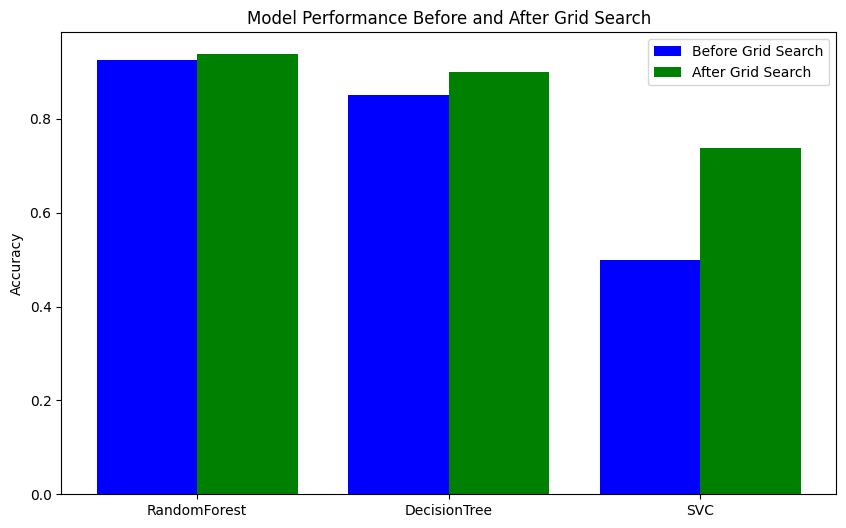

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

file_path = 'filtered_soil_dataset.csv'
soil_data = pd.read_csv(file_path)
X = soil_data.drop(columns=["wet", "Unnamed: 0", "plot", "seq", "seqcode"])
y = soil_data["wet"]

imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(X)

models_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [50, 100, 150], "max_depth": [None, 10, 20]}
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {"max_depth": [None, 10, 20], "criterion": ["gini", "entropy"]}
    },
    "SVC": {
        "model": SVC(random_state=42),
        "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    }
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

pre_grid_accuracies = {}
post_grid_accuracies = {}

for model_name, mp in models_params.items():
    fold_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        mp["model"].fit(X_train, y_train)
        y_pred = mp["model"].predict(X_test)
        fold_accuracies.append(accuracy_score(y_test, y_pred))
    pre_grid_accuracies[model_name] = sum(fold_accuracies) / len(fold_accuracies)

    grid_search = GridSearchCV(mp["model"], mp["params"], cv=kf, scoring="accuracy")
    grid_search.fit(X, y)
    post_grid_accuracies[model_name] = grid_search.best_score_

labels = list(models_params.keys())
pre_values = [pre_grid_accuracies[m] for m in labels]
post_values = [post_grid_accuracies[m] for m in labels]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, pre_values, width=0.4, label="Before Grid Search", color='blue', align='center')
plt.bar([p + 0.4 for p in x], post_values, width=0.4, label="After Grid Search", color='green', align='center')
plt.xticks([p + 0.2 for p in x], labels)
plt.ylabel("Accuracy")
plt.title("Model Performance Before and After Grid Search")
plt.legend()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a10c668a741de250aa0d992f0e81a78d7f9172bb3017fd453edc09eb91ef5d8c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime

Interpreting LIME Explanation:
- Because LAI <= 0.40, the model increased the probability of being 'wet' by 0.074
- Because soilmoist > 13.12, the model decreased the probability of being 'wet' by 0.053
- Because 0.08 < exchNa <= 0.12, the model increased the probability of being 'wet' by 0.038
- Because 0.04 < exchK <= 0.06, the model increased the probability of being 'wet' by 0.035
- Because 0.78 < fung <= 1.59, the model decreased the probability of being 'wet' by 0.034
- Because 0.18 < nema_bact <= 0.28, the model increased the probability of being 'wet' by 0.024
- Because co3 > 33.70,

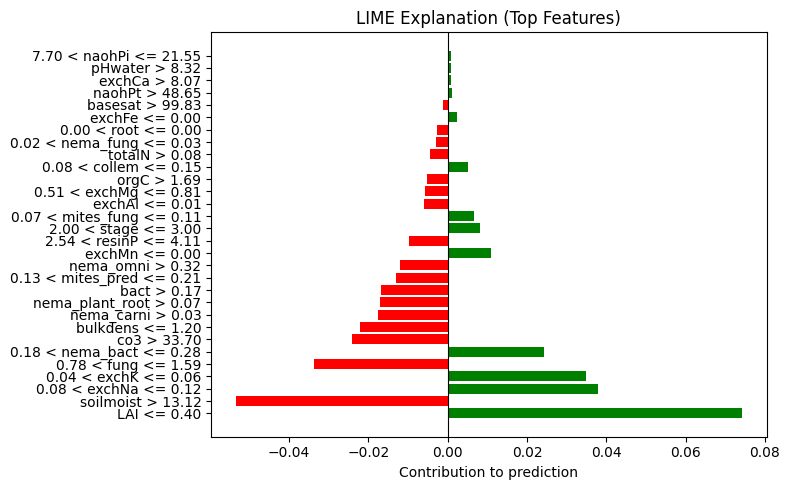

SHAP Waterfall Plot for sample 0


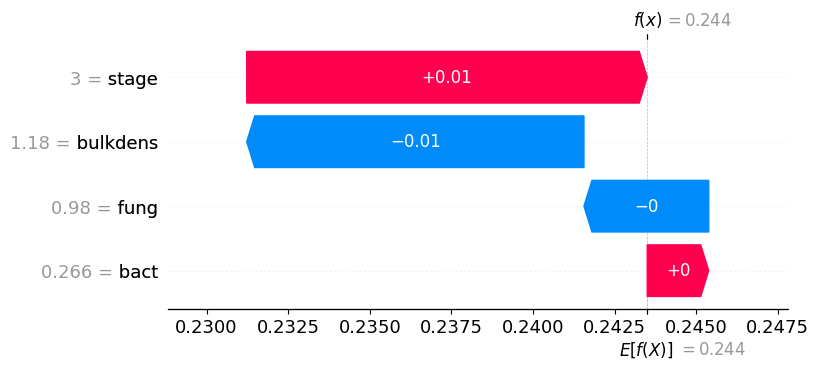

In [ ]:
!pip install lime shap
import lime
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import lime.lime_tabular

best_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    models_params["RandomForest"]["params"],
    cv=kf,
    scoring="accuracy"
)
best_rf.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
sample_idx = 0
sample = X_test[sample_idx]
feature_names = soil_data.drop(columns=["wet", "Unnamed: 0", "plot", "seq", "seqcode"]).columns.tolist()
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=['not wet', 'wet'],
    mode='classification'
)

lime_exp = explainer_lime.explain_instance(
    data_row=sample,
    predict_fn=best_rf.best_estimator_.predict_proba,
    num_features=len(feature_names)
)


print("\nInterpreting LIME Explanation:")
for condition, weight in lime_exp.as_list():
    impact = "increased" if weight > 0 else "decreased"
    print(f"- Because {condition}, the model {impact} the probability of being 'wet' by {abs(weight):.3f}")


print("\nFeature values of the explained sample:")
sample_series = pd.Series(sample, index=feature_names)
for fname, fval in sample_series.items():
    print(f"{fname}: {fval}")

import matplotlib.pyplot as plt

if 'lime_exp' in locals():
    labels, weights = zip(*lime_exp.as_list())
    colors = ['green' if w > 0 else 'red' for w in weights]

    plt.figure(figsize=(8, 5))
    plt.barh(labels, weights, color=colors)
    plt.xlabel('Contribution to prediction')
    plt.title('LIME Explanation (Top Features)')
    plt.axvline(0, color='black', linewidth=0.8)
    plt.tight_layout()
    plt.show()
else:
    print("LIME explanation could not be generated.")

explainer_shap = shap.TreeExplainer(best_rf.best_estimator_)
shap_values = explainer_shap.shap_values(X_test)

print("SHAP Waterfall Plot for sample", sample_idx)
if 'feature_names' in locals():
    shap.plots.waterfall(shap.Explanation(
        values=shap_values[1][sample_idx],
        base_values=explainer_shap.expected_value[1],
        data=X_test[sample_idx], # Use the actual data point
        feature_names=feature_names
    ))
else:
     print("Feature names not available for SHAP plot.")

In [ ]:
explainer_shap = shap.TreeExplainer(best_rf.best_estimator_)
shap_values = explainer_shap.shap_values(X_test)

print("SHAP Waterfall Plot for sample", sample_idx)
shap.plots.waterfall(shap.Explanation(
    values=shap_values[1][sample_idx],
    base_values=explainer_shap.expected_value[1],
    data=sample,
    feature_names=feature_names
))

Model Accuracies:

RandomForest:
 Accuracy before Grid Search: 0.9250
 Accuracy after Grid Search: 0.9375

DecisionTree:
 Accuracy before Grid Search: 0.8500
 Accuracy after Grid Search: 0.9000

SVC:
 Accuracy before Grid Search: 0.5000
 Accuracy after Grid Search: 0.7375



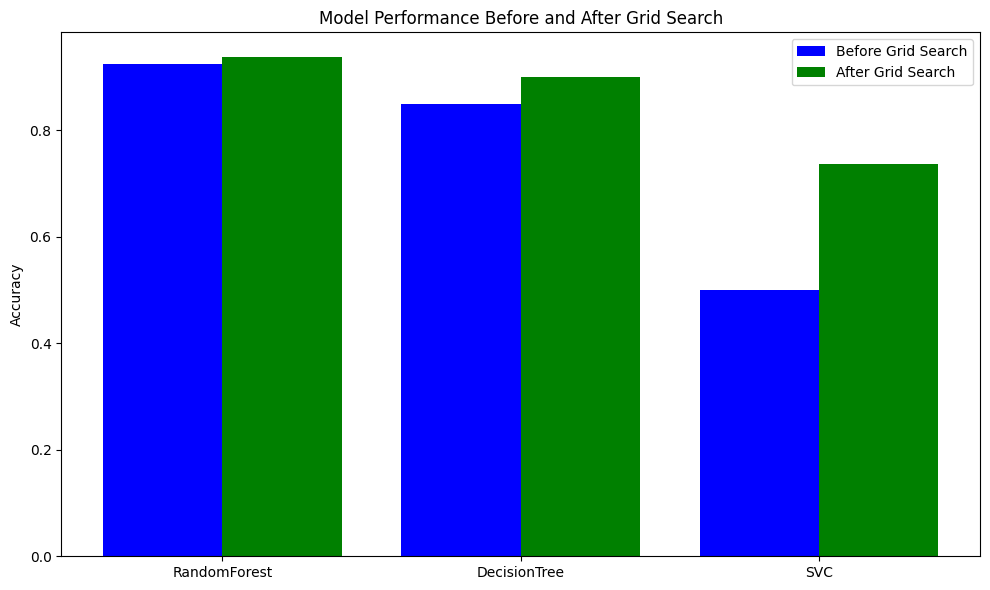

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
file_path = 'filtered_soil_dataset.csv'
soil_data = pd.read_csv(file_path)

X = soil_data.drop(columns=["wet", "Unnamed: 0", "plot", "seq", "seqcode"])
y = soil_data["wet"]
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
models_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [50, 100, 150], "max_depth": [None, 10, 20]}
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {"max_depth": [None, 10, 20], "criterion": ["gini", "entropy"]}
    },
    "SVC": {
        "model": SVC(random_state=42),
        "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    }
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

pre_grid_accuracies = {}
post_grid_accuracies = {}
for model_name, mp in models_params.items():
    fold_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        mp["model"].fit(X_train, y_train)
        y_pred = mp["model"].predict(X_test)
        fold_accuracies.append(accuracy_score(y_test, y_pred))

    pre_grid_accuracies[model_name] = sum(fold_accuracies) / len(fold_accuracies)

    grid_search = GridSearchCV(mp["model"], mp["params"], cv=kf, scoring="accuracy")
    grid_search.fit(X, y)
    post_grid_accuracies[model_name] = grid_search.best_score_

print("Model Accuracies:\n")
for model_name in models_params:
    print(f"{model_name}:")
    print(f" Accuracy before Grid Search: {pre_grid_accuracies[model_name]:.4f}")
    print(f" Accuracy after Grid Search: {post_grid_accuracies[model_name]:.4f}\n")

labels = list(models_params.keys())
pre_values = [pre_grid_accuracies[m] for m in labels]
post_values = [post_grid_accuracies[m] for m in labels]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, pre_values, width=0.4, label="Before Grid Search", color='blue', align='center')
plt.bar([p + 0.4 for p in x], post_values, width=0.4, label="After Grid Search", color='green', align='center')
plt.xticks([p + 0.2 for p in x], labels)
plt.ylabel("Accuracy")
plt.title("Model Performance Before and After Grid Search")
plt.legend()
plt.tight_layout()
plt.show()

Best Params for RandomForest: {'max_depth': None, 'n_estimators': 50}
Best Params for DecisionTree: {'criterion': 'entropy', 'max_depth': None}
Best Params for SVC: {'svc__C': 10, 'svc__kernel': 'rbf'}
Best Params for KNN: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Best Params for LogisticRegression: {'lr__C': 10, 'lr__solver': 'lbfgs'}
Best Params for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:08:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Params for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Params for MLP: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 50)}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:09:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:09:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:09:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:09:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:09:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Model Accuracies:

RandomForest:
 Before Grid Search: 0.9250
 After Grid Search: 0.9375
DecisionTree:
 Before Grid Search: 0.8500
 After Grid Search: 0.9000
SVC:
 Before Grid Search: 0.8875
 After Grid Search: 0.9250
KNN:
 Before Grid Search: 0.7250
 After Grid Search: 0.7625
LogisticRegression:
 Before Grid Search: 0.8875
 After Grid Search: 0.9250
GradientBoosting:
 Before Grid Search: 0.8875
 After Grid Search: 0.8875
XGBoost:
 Before Grid Search: 0.8750
 After Grid Search: 0.8750
MLP:
 Before Grid Search: 0.8875
 After Grid Search: 0.9375

Ensemble Voting Classifier Accuracy: 0.9750


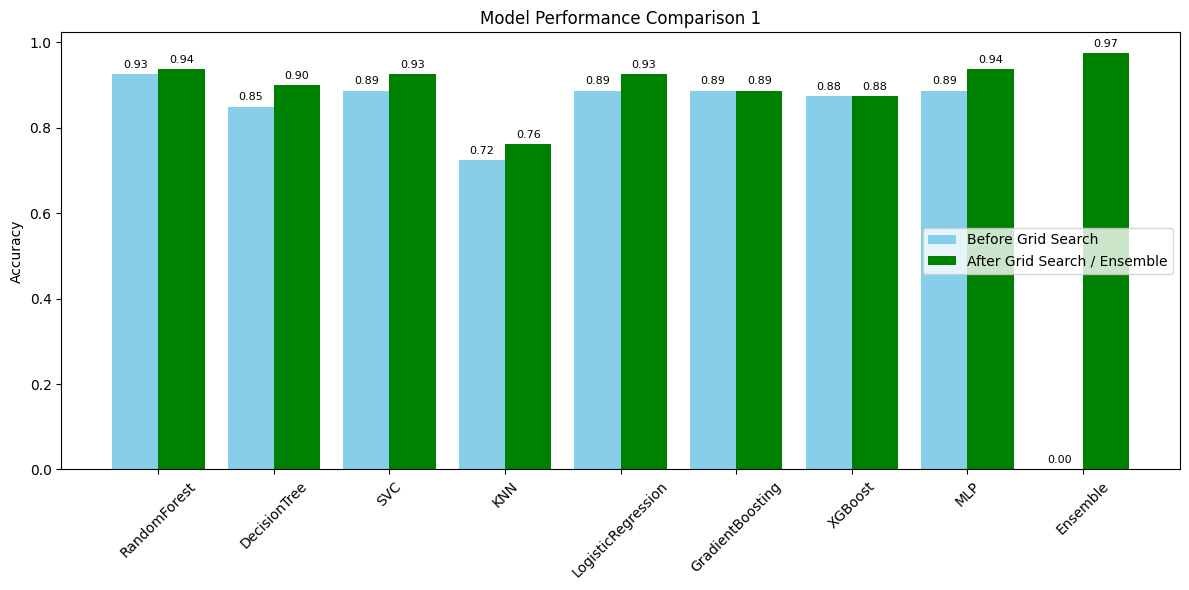

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


file_path = 'filtered_soil_dataset.csv'
soil_data = pd.read_csv(file_path)
X = soil_data.drop(columns=["wet", "Unnamed: 0", "plot", "seq", "seqcode"])
y = soil_data["wet"]
le = LabelEncoder()
y = le.fit_transform(y)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
kf = KFold(n_splits=10, shuffle=True, random_state=42)


models_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [50, 100], "max_depth": [None, 10]}
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {"max_depth": [None, 10], "criterion": ["gini", "entropy"]}
    },
    "SVC": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("svc", SVC(probability=True, random_state=42))
        ]),
        "params": {
            "svc__C": [0.1, 1, 10],
            "svc__kernel": ["linear", "rbf"]
        }
    },
    "KNN": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier())
        ]),
        "params": {
            "knn__n_neighbors": [3, 5, 7],
            "knn__weights": ["uniform", "distance"]
        }
    },
    "LogisticRegression": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("lr", LogisticRegression(max_iter=1000, random_state=42))
        ]),
        "params": {
            "lr__C": [0.1, 1, 10],
            "lr__solver": ["liblinear", "lbfgs"]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    },
    "MLP": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("mlp", MLPClassifier(max_iter=500, random_state=42))
        ]),
        "params": {
            "mlp__hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "mlp__activation": ["relu", "tanh"],
            "mlp__alpha": [0.0001, 0.001]
        }
    }
}


pre_grid_accuracies = {}
post_grid_accuracies = {}
best_estimators = {}
for model_name, mp in models_params.items():
    fold_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index] # Use NumPy indexing for y as well
        mp["model"].fit(X_train, y_train)
        y_pred = mp["model"].predict(X_test)
        fold_accuracies.append(accuracy_score(y_test, y_pred))
    pre_grid_accuracies[model_name] = sum(fold_accuracies) / len(fold_accuracies)
    grid = GridSearchCV(mp["model"], mp["params"], cv=kf, scoring="accuracy", n_jobs=-1)
    grid.fit(X, y)
    post_grid_accuracies[model_name] = grid.best_score_
    best_estimators[model_name] = grid.best_estimator_
    print(f"Best Params for {model_name}: {grid.best_params_}")

ensemble = VotingClassifier(
    estimators=[(name, model) for name, model in best_estimators.items()],
    voting='soft'
)

ensemble_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)
    ensemble_scores.append(accuracy_score(y_test, y_pred))

ensemble_acc = sum(ensemble_scores) / len(ensemble_scores)

print("\nModel Accuracies:\n")
for model_name in models_params:
    print(f"{model_name}:")
    print(f" Before Grid Search: {pre_grid_accuracies[model_name]:.4f}")
    print(f" After Grid Search: {post_grid_accuracies[model_name]:.4f}")
print(f"\nEnsemble Voting Classifier Accuracy: {ensemble_acc:.4f}")

labels = list(models_params.keys()) + ["Ensemble"]
pre_values = [pre_grid_accuracies[m] for m in models_params]
post_values = [post_grid_accuracies[m] for m in models_params]
post_values.append(ensemble_acc)

x = range(len(labels))
bar_width = 0.4

plt.figure(figsize=(12, 6))
pre_bars = plt.bar(x, pre_values + [0], width=bar_width, label="Before Grid Search", color='skyblue', align='center')
post_bars = plt.bar([p + bar_width for p in x], post_values, width=bar_width, label="After Grid Search / Ensemble", color='green', align='center')
for bar in pre_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", ha='center', va='bottom', fontsize=8)

for bar in post_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", ha='center', va='bottom', fontsize=8)

plt.xticks([p + bar_width/2 for p in x], labels, rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison 1")
plt.legend()
plt.tight_layout()
plt.savefig("model_accuracy_comparison_11.png", dpi=300)  # Save as high-quality PNG
plt.show()

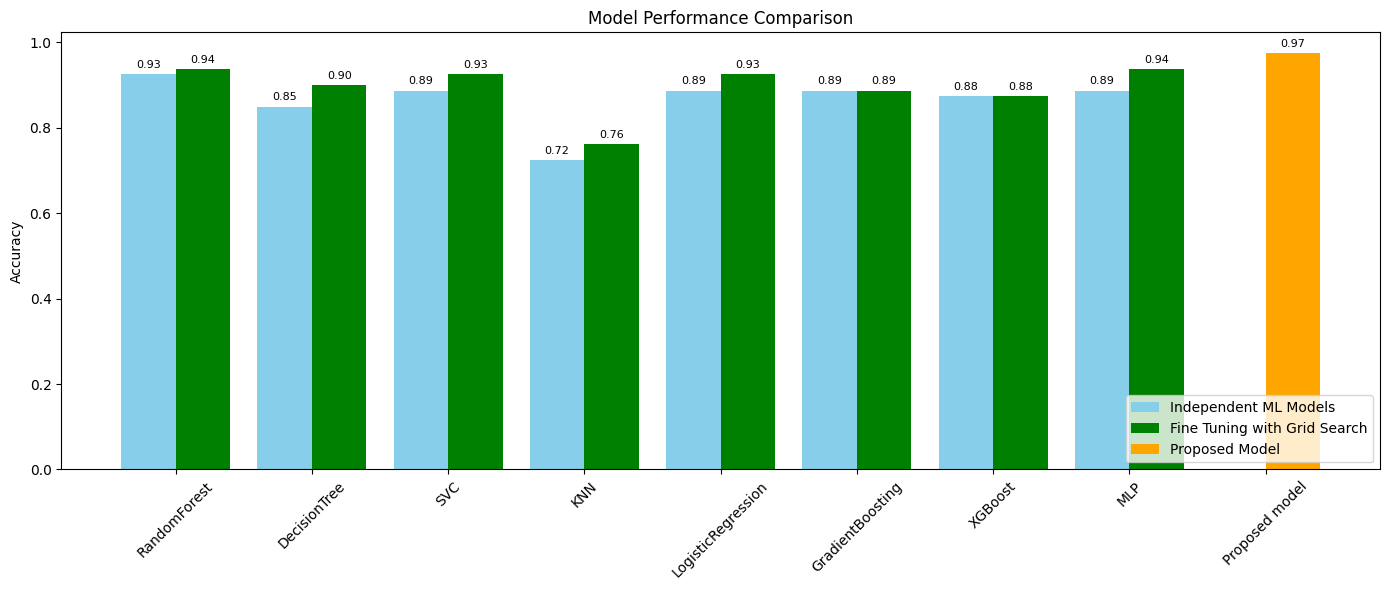

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

labels = list(models_params.keys())
pre_values = [pre_grid_accuracies[m] for m in models_params]
post_values = [post_grid_accuracies[m] for m in models_params]
labels.append("Proposed model")
post_values.append(ensemble_acc)

x = range(len(labels))
bar_width = 0.4
plt.figure(figsize=(14, 6))
pre_bars = plt.bar(x[:len(models_params)], pre_values, width=bar_width, label="Independent ML Models", color='skyblue', align='center')
post_bars = plt.bar([p + bar_width for p in x[:len(models_params)]], post_values[:-1], width=bar_width, label="Fine Tuning with Grid Search", color='green', align='center')
proposed_bar = plt.bar(x[-1] + bar_width, post_values[-1], width=bar_width, color='orange', label="Proposed Model")
for bar in pre_bars + post_bars + proposed_bar:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f"{height:.2f}", ha='center', va='bottom', fontsize=8)

plt.xticks([p + bar_width / 2 for p in x], labels, rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
legend_elements = [
    Patch(facecolor='skyblue', label='Independent ML Models'),
    Patch(facecolor='green', label='Fine Tuning with Grid Search'),
    Patch(facecolor='orange', label='Proposed Model')
]
plt.legend(handles=legend_elements)
plt.tight_layout()
plot_filename = "model_accuracy_comparison.png"
plt.savefig(plot_filename, dpi=300)
plt.show()


In [ ]:
import pandas as pd
rows = []
for name, estimator in best_estimators.items():
    if isinstance(estimator, Pipeline):
        model_step = list(estimator.named_steps.values())[-1]
        params = model_step.get_params()
    else:
        params = estimator.get_params()

    filtered_params = {k: v for k, v in params.items() if k in ['max_depth', 'n_estimators', 'C', 'learning_rate', 'hidden_layer_sizes', 'alpha', 'kernel', 'criterion']}
    filtered_params['Model'] = name
    rows.append(filtered_params)

params_df = pd.DataFrame(rows).fillna("N/A")
print("Best Parameters per Model:")
display(params_df)


Best Parameters per Model:


,criterion,max_depth,n_estimators,Model,C,kernel,learning_rate,alpha,hidden_layer_sizes
0,gini,N/A,50.0,RandomForest,N/A,N/A,N/A,N/A,N/A
1,entropy,N/A,N/A,DecisionTree,N/A,N/A,N/A,N/A,N/A
2,N/A,N/A,N/A,SVC,10.0,rbf,N/A,N/A,N/A
3,N/A,N/A,N/A,KNN,N/A,N/A,N/A,N/A,N/A
4,N/A,N/A,N/A,LogisticRegression,10.0,N/A,N/A,N/A,N/A
5,friedman_mse,3.0,50.0,GradientBoosting,N/A,N/A,0.1,N/A,N/A
6,N/A,3.0,50.0,XGBoost,N/A,N/A,0.1,N/A,N/A
7,N/A,N/A,N/A,MLP,N/A,N/A,constant,0.0001,"(50, 50)"


In [ ]:
from IPython.display import FileLink
FileLink(r'model_accuracy_comparison.png')


/content/model_accuracy_comparison.png